# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [55]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 


In [2]:
%matplotlib inline

In [5]:
pd.set_option('display.max_columns',None)

# Load the dataset and explore the variables

In [3]:
df = pd.read_csv('files_for_lab/customer_churn.csv')

In [13]:
df.head(16)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
df.shape

(7043, 21)

In [61]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## SeniorCitizen

In [83]:
sc_count = df.SeniorCitizen.value_counts()
sc_count

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
# SeniorCitizen is categorical --> ??

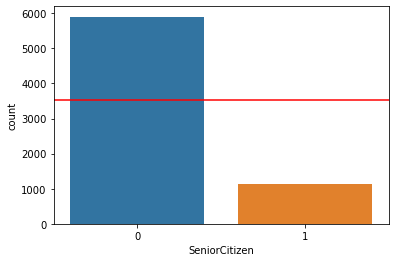

In [23]:
sns.countplot(x='SeniorCitizen', data=df);
plt.axhline(y=1142+(5901-1142)/2, color='r')
plt.show()

In [ ]:
# There is obviously class imbalance

In [84]:
print("The class imbalance ratio of SeniorCitizen is: {:.2f}".format((sc_count[0]-sc_count[1])/len(df)))


The class imbalance ratio of SeniorCitizen is: 0.68


In [108]:
sc_count[0]/len(df)

0.8378531875621185

In [109]:
# ¿Cual es el class imbalance dentro de los senior?

In [111]:
senior = df[df.SeniorCitizen == 1]
senior

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [113]:
senior.Churn.value_counts()

No     666
Yes    476
Name: Churn, dtype: int64

In [114]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Tenure

In [12]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

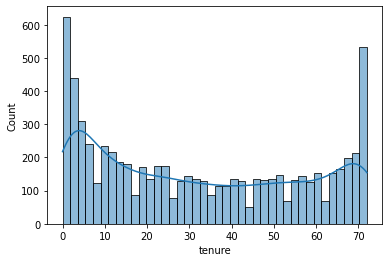

In [46]:
sns.histplot(df.tenure, kde=True, bins = 40)
plt.show()

In [26]:
df.tenure.skew()

0.2395397495619829

In [25]:
df.tenure.kurtosis()

-1.387371635971685

## MonthlyCharges

In [14]:
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

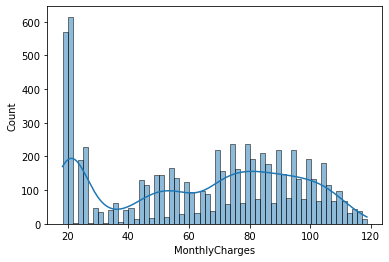

In [43]:
sns.histplot(df.MonthlyCharges, kde=True, bins = 60)
plt.show()

In [27]:
df.MonthlyCharges.skew()

-0.22052443394398033

In [28]:
df.MonthlyCharges.kurtosis()

-1.2572596945495056

## Pairplot

In [59]:
reduced = df[['SeniorCitizen','tenure','MonthlyCharges','Churn']]

In [62]:
reduced.SeniorCitizen = pd.Categorical(reduced.SeniorCitizen)

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [63]:
reduced.SeniorCitizen.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

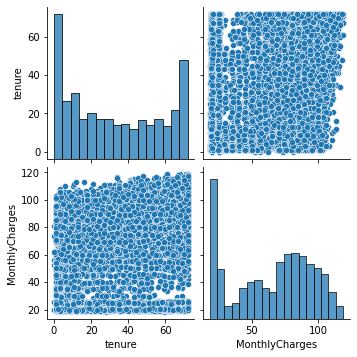

In [64]:
sns.pairplot(reduced)
plt.show()

In [ ]:
## Pairplot excludes object and categorical

In [ ]:
# How do I measure the correlation between categorical and numerical variables?

# Extract the target variable

In [30]:
y = df.Churn

In [76]:
churn_count = y.value_counts()
churn_count

No     5174
Yes    1869
dtype: int64

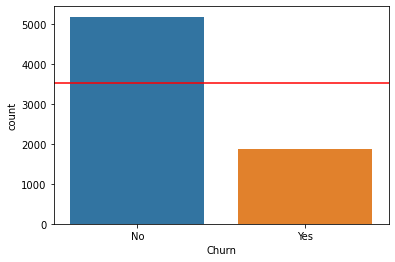

In [48]:
sns.countplot(x='Churn', data= df)
plt.axhline(y=len(y)/2, color = 'r')
plt.show()

In [82]:
print("The class imbalance ratio is: {:.2f}".format((churn_count[0]-churn_count[1])/len(y)))


The class imbalance ratio is: 0.47


We have a really big class imbalance!!! :))

In [34]:
y.dtypes

dtype('O')

In [35]:
y = pd.Categorical(y)

In [38]:
# .dtypes return an error
y.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [37]:
y.categories

Index(['No', 'Yes'], dtype='object')

In [75]:
y.value_counts()

No     5174
Yes    1869
dtype: int64

# Extract the independent variables and scale them

## Extracting

In [39]:
X = df[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [40]:
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

In [41]:
X.rename(columns={'SeniorCitizen':'sc','MonthlyCharges':'mc'}, inplace=True)
X.head()

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,tenure,sc,mc
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [42]:
X.sc = pd.Categorical(X.sc)
X.dtypes

/Users/albertomengual/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


tenure       int64
sc        category
mc         float64
dtype: object

## scaling

### Check colinearity

In [49]:
X.corr()

,tenure,mc
tenure,1.0000,0.2479
mc,0.2479,1.0000


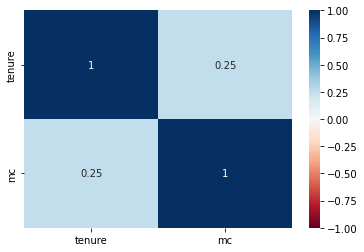

In [53]:
sns.heatmap(X.corr(), annot = True, vmin = -1, vmax =1, cmap = 'RdBu')
plt.show()

### Scale

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
display(X_train_scaled.head(8))

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head(8)

,tenure,sc,mc
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427
5,1.046330,-0.435476,0.503285
6,-0.258631,-0.435476,0.701800
7,-1.237352,-0.435476,0.181323


,tenure,sc,mc
0,-0.544091,-0.435476,-0.217375
1,1.127890,-0.435476,1.731076
2,-0.788772,-0.435476,0.241378
3,-1.278132,-0.435476,-1.476862
4,0.923990,-0.435476,0.434889
5,-1.196572,2.296336,0.506621
6,-0.380971,-0.435476,-0.167330
7,-1.278132,2.296336,0.161305


In [66]:
X_train_scaled.describe()

,tenure,sc,mc
count,5.282000e+03,5.282000e+03,5.282000e+03
mean,-1.107701e-16,-5.258846e-16,-3.584158e-16
std,1.000095e+00,1.000095e+00,1.000095e+00
min,-1.318912e+00,-4.354763e-01,-1.550263e+00
25%,-9.518918e-01,-4.354763e-01,-9.663949e-01
50%,-1.362912e-01,-4.354763e-01,1.863278e-01
75%,9.239896e-01,-4.354763e-01,8.369237e-01
max,1.617250e+00,2.296336e+00,1.799472e+00


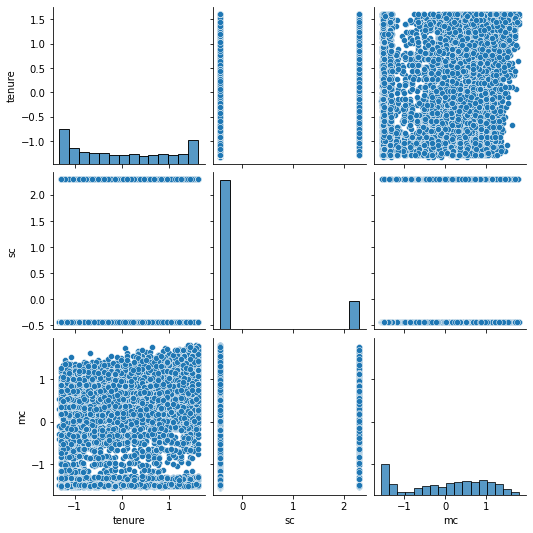

In [67]:
sns.pairplot(X_train_scaled)
plt.show()

In [68]:
X_train_scaled.index

RangeIndex(start=0, stop=5282, step=1)

In [69]:
y_train.index

AttributeError: 'Categorical' object has no attribute 'index'

In [70]:
y_train

['No', 'No', 'Yes', 'No', 'Yes', ..., 'No', 'No', 'No', 'Yes', 'No']
Length: 5282
Categories (2, object): ['No', 'Yes']

In [71]:
y_train.categories

Index(['No', 'Yes'], dtype='object')

# Build the Logistic Regression model

In [73]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_scaled,y_train)

LogisticRegression(random_state=0)

## Predictions

In [74]:
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

# Evaluate the model

In [85]:
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.78


In [ ]:
# Those metrics: Precison, Recall and F1 change with the pos_label argument

In [163]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label = 'Yes'))) # labels = ['No','Yes'], 
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label = 'Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label = 'Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))


The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.38


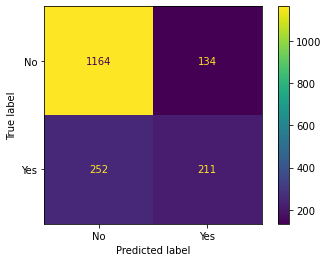

In [106]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

# Why is the accuracy higher than 70%?

## Review the original data

In [115]:
reduced

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


## Review the inner class imbalances between classes

In [116]:
loyal = reduced[reduced.Churn == 'No']
loyal

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
3,0,45,42.30,No
6,0,22,89.10,No
7,0,10,29.75,No
...,...,...,...,...
7037,0,72,21.15,No
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No


In [117]:
loyal.SeniorCitizen.value_counts()

0    4508
1     666
Name: SeniorCitizen, dtype: int64

In [118]:
cm_test

array([[1164,  134],
       [ 252,  211]])

In [119]:
# Predicted No
sum(cm_test[:,0])

1416

In [120]:
# Predicted Yes
sum(cm_test[:,1])

345

In [121]:
y_train.value_counts()

No     3876
Yes    1406
dtype: int64

## Get the logits: pairplot and correlation

In [122]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

In [123]:
logits

array([-1.58958405, -2.08657509, -0.68826966, ..., -4.40639695,
        1.05197978, -1.3631139 ])

In [127]:
logits = pd.Series(logits)

In [128]:
X_logits = pd.concat([X_train_scaled,logits], axis =1)
X_logits

,tenure,sc,mc,0
0,-0.340191,-0.435476,-0.514314,-1.589584
1,0.883210,2.296336,0.017840,-2.086575
2,-1.196572,-0.435476,-0.819594,-0.688270
3,1.168670,-0.435476,-1.483535,-4.591730
4,-0.829552,-0.435476,0.658427,0.189525
...,...,...,...,...
5277,-0.707212,-0.435476,1.292341,0.614650
5278,-0.911112,-0.435476,0.880297,0.510827
5279,1.046330,-0.435476,-1.466853,-4.406397
5280,-1.278132,2.296336,0.167978,1.051980


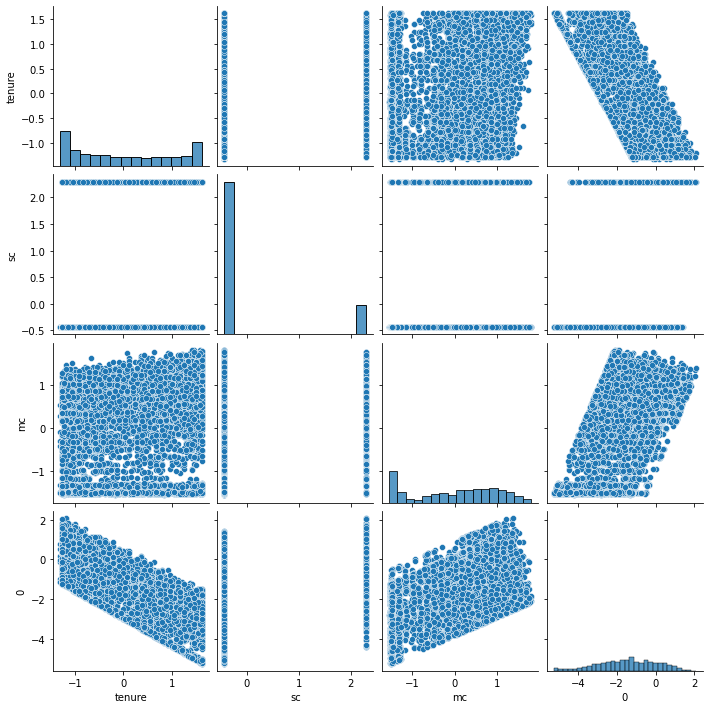

In [130]:
sns.pairplot(X_logits)
plt.show()

In [131]:
X_logits.corr()

,tenure,sc,mc,0
tenure,1.000000,0.022777,0.244366,-0.755654
sc,0.022777,1.000000,0.219937,0.282886
mc,0.244366,0.219937,1.000000,0.430223
0,-0.755654,0.282886,0.430223,1.000000


In [132]:
lr.coef_

array([[-1.38695334,  0.25641795,  0.93830562]])

In [133]:
lr.intercept_

array([-1.46716579])

In [ ]:
# Maybe because of the good correlation of the logits with the tenure variable.

# SMOTE

Synthetic Minority Oversampling Technique. It is an oversampling technique based on nearest neighbors that adds  
new points.

Apply imblearn.over_sampling.SMOTE. Build again the logistic regression and evaluate. Is there any improvement?

In [135]:
sm = SMOTE(random_state=0,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [145]:
y_train_SMOTE

array(['No', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [144]:
np.unique(y_train_SMOTE, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([3876, 3876]))

In [152]:
len(X_train_SMOTE)

7752

In [153]:
len(X_train_SMOTE)-len(X_train_scaled)

2470

In [157]:
y_train.value_counts()

No     3876
Yes    1406
dtype: int64

In [158]:
y_train.value_counts()[0]-y_train.value_counts()[1]

2470

In [ ]:
# It creates the necessary number of rows to have balance in the depedent variable within the train
# dataset
# Then we fit the linear regression with those fake rows, so we have a balanced model
# And finally predict the test sample

## Build Model

In [160]:
lr_SMOTE = LogisticRegression(random_state = 0)
lr_SMOTE.fit(X_train_SMOTE,y_train_SMOTE)

LogisticRegression(random_state=0)

## Predictions

In [161]:
y_pred_train_SMOTE = lr_SMOTE.predict(X_train_SMOTE)
y_pred_test_SMOTE = lr_SMOTE.predict(X_test_scaled)

## Evaluate

In [165]:
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr_SMOTE.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.72


In [164]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test_SMOTE)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test_SMOTE, pos_label = 'Yes'))) # labels = ['No','Yes'], 
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test_SMOTE, pos_label = 'Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test_SMOTE, pos_label = 'Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test_SMOTE)))



The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.71
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.37


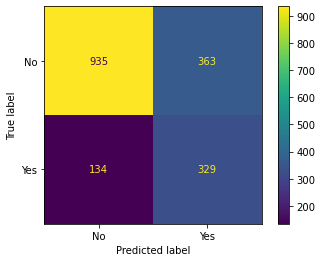

In [166]:
cm_SMOTE = confusion_matrix(y_test,y_pred_test_SMOTE)
disp_SMOTE = ConfusionMatrixDisplay(confusion_matrix=cm_SMOTE, display_labels=lr_SMOTE.classes_)
disp_SMOTE.plot()
plt.show()

In [ ]:
# There is not really any improve, the metrics rather slightly decay. 
# Just the Recall improves, but even the kappa score.

In [ ]:
# ??? Is there any possibility to improve the model? With SMOTE?